Importing Packages

In [1]:
import pandas as pd #dataset
import numpy as np # matematis
import matplotlib.pyplot as plt #visual
from sklearn.model_selection import train_test_split #splitting dataset
import statsmodels.api as sm #model OLS
from sklearn.linear_model import BayesianRidge #model Bayes
from sklearn.svm import SVR #model SVM
from statsmodels.tools.eval_measures import rmse #evaluation model: RMSE

Data Preprocessing

In [2]:
#read data
from google.colab import drive
drive.mount('/content/drive') #connect to gdrive

df=pd.read_csv('/content/drive/MyDrive/Training/datasets/Salary_dataset.csv') #read csv
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
df = df.drop('No', axis=1) #drop column 'No'
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [4]:
df.describe() #describing statistics of data

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [5]:
df.isnull().any().any() #checking for missing data

False

In [6]:
df.corr() #correlation between the variables(s)

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


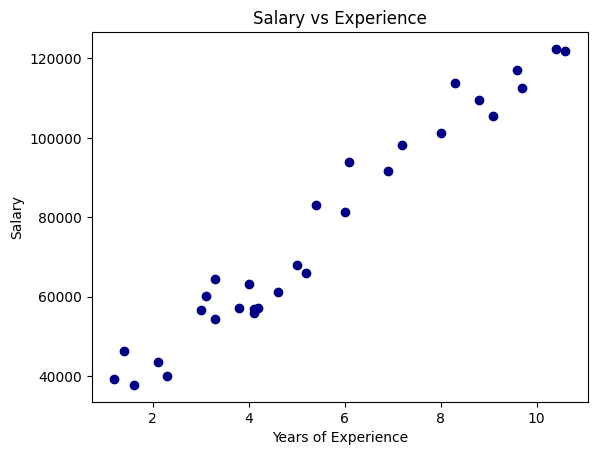

In [7]:
# Visualizing the dataset
plt.scatter(df['YearsExperience'], df['Salary'], color = 'navy')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [8]:
#Sklearn expecting 2D array

YearsExperience = df[['YearsExperience']]
Salary = df['Salary']


In [9]:
#Years of Experience are the factor that impacts to Employee's Salary. 
#Since they have a causal relation, then it can be handled by Regression Model.
#X=YearsExperience (the cause) & Y=Salary (the impact) 

YearsExperience_train, YearsExperience_test, Salary_train, Salary_test = train_test_split(YearsExperience, Salary, test_size=1/3, random_state=30)

In [10]:
YearsExperience_train

,YearsExperience
11,4.1
22,8.0
18,6.0
19,6.1
1,1.4
16,5.2
7,3.3
9,3.8
3,2.1
14,4.6


In [11]:
YearsExperience_test

,YearsExperience
15,5.0
28,10.4
26,9.6
10,4.0
24,8.8
0,1.2
8,3.3
6,3.1
25,9.1
4,2.3


In [12]:
Salary_train

11     55795.0
22    101303.0
18     81364.0
19     93941.0
1      46206.0
16     66030.0
7      54446.0
9      57190.0
3      43526.0
14     61112.0
17     83089.0
21     98274.0
2      37732.0
23    113813.0
12     56958.0
20     91739.0
27    112636.0
13     57082.0
29    121873.0
5      56643.0
Name: Salary, dtype: float64

In [13]:
Salary_test

15     67939.0
28    122392.0
26    116970.0
10     63219.0
24    109432.0
0      39344.0
8      64446.0
6      60151.0
25    105583.0
4      39892.0
Name: Salary, dtype: float64

Ordinary Least Square Model

In [14]:
model_OLS = sm.OLS(Salary_train, YearsExperience_train)
models = model_OLS.fit()
print(models.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              852.0
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                    3.02e-17
Time:                        16:15:23   Log-Likelihood:                         -215.59
No. Observations:                  20   AIC:                                      433.2
Df Residuals:                      19   BIC:                                      434.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [15]:
Predict_Salary_OLS = models.predict(YearsExperience_test)
Predict_Salary_OLS

15     66531.126806
28    138384.743756
26    127739.763467
10     53224.901445
24    117094.783178
0      15967.470433
8      43910.543692
6      41249.298620
25    121086.650787
4      30604.318331
dtype: float64

In [16]:
Salary_test

15     67939.0
28    122392.0
26    116970.0
10     63219.0
24    109432.0
0      39344.0
8      64446.0
6      60151.0
25    105583.0
4      39892.0
Name: Salary, dtype: float64

In [17]:
#RMSE
RMSE_OLS = rmse(Salary_test, Predict_Salary_OLS)
RMSE_OLS

14779.728180293532

Bayessian Regression

In [18]:
model_BR = BayesianRidge()

In [19]:
model_BR = model_BR.fit(YearsExperience_train, Salary_train)

In [20]:
Predict_Salary_BR = model_BR.predict(YearsExperience_test)

In [21]:
Predict_Salary_BR

array([ 71822.50942845, 124184.97045114, 116427.56881815,  62125.75738721,
       108670.16718516,  34974.85167174,  55338.03095835,  53398.6805501 ,
       111579.19279753,  45641.27891711])

In [22]:
#RMSE
RMSE_BR = rmse(Salary_test, Predict_Salary_BR)
RMSE_BR

4868.399121047909

Support Vector Machine Regression

In [23]:
model_SVMR = SVR(kernel='rbf')

In [24]:
model_SVMR.fit(YearsExperience_train, Salary_train)

SVR()

In [25]:
Predict_Salary_SVMR = model_SVMR.predict(YearsExperience_test)

In [26]:
Predict_Salary_SVMR

array([63571.40936104, 63575.70681988, 63576.75408488, 63567.56866549,
       63577.7038225 , 63567.40951726, 63565.96977874, 63565.73293065,
       63577.37234586, 63565.71924221])

In [27]:
#RMSE
RMSE_SVMR = rmse(Salary_test, Predict_Salary_SVMR)
RMSE_SVMR

33698.86502396974

Best Model

In [28]:
print('RMSE of Ordinary Least Square Model:', RMSE_OLS)
print('RMSE of Bayesian Regression Model:', RMSE_BR)
print('RMSE of Support Vector Machine Regression Model:', RMSE_SVMR)

RMSE of Ordinary Least Square Model: 14779.728180293532
RMSE of Bayesian Regression Model: 4868.399121047909
RMSE of Support Vector Machine Regression Model: 33698.86502396974


The best model for this study case is Bayessian Regression Model which has the lowest value of RMSE.